## RQ5

In [2]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
#this way we can visualize in the notebook
%matplotlib inline 

In [3]:
players = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/players.json")

In [5]:
players.head()

,birthArea,birthDate,currentNationalTeamId,currentTeamId,firstName,foot,height,lastName,middleName,passportArea,role,shortName,weight,wyId
0,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...",1989-06-17,4687,4502,Harun,right,187,Tekin,,"{'name': 'Turkey', 'id': '792', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",H. Tekin,78,32777
1,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-01-23,4423,3775,Malang,left,182,Sarr,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",M. Sarr,73,393228
2,"{'name': 'France', 'id': '250', 'alpha3code': ...",1998-10-26,null,3772,Over,,176,Mandanda,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'GK', 'code3': 'GKP', 'name': 'Goalk...",O. Mandanda,72,393230
3,"{'name': 'France', 'id': '250', 'alpha3code': ...",1990-03-06,19314,683,Alfred John Momar,right,187,N'Diaye,,"{'name': 'Senegal', 'id': '686', 'alpha3code':...","{'code2': 'MD', 'code3': 'MID', 'name': 'Midfi...",A. N'Diaye,82,32793
4,"{'name': 'France', 'id': '250', 'alpha3code': ...",1999-05-25,null,2975,Ibrahima,right,192,Konat\u00e9,,"{'name': 'France', 'id': '250', 'alpha3code': ...","{'code2': 'DF', 'code3': 'DEF', 'name': 'Defen...",I. Konat\u00e9,84,393247


In [8]:
events = pd.read_json("C:/Users/Luca/Desktop/-/Università/Magistrale/Primo anno/Primo semestre/ADM/Homeworks/Homework #2/Data/events/events_England.json")

In [ ]:
# We only need the datasets "players" and "events", events has the id of the player

In [9]:
#we are only interested in the Duels and then pick the air duels tag 1801
duel = events[events["subEventName"] == "Air duel"][["id", "matchId", "playerId", "tags", "teamId"]] 
#duel 

In [ ]:
# number of players that have an ID that is Non-zero, just to check
# duel["playerId"].astype(bool).sum(axis=0) 

In [10]:
# it gives us only 34778 records vs 37760 of duel, why? There are players with ID = 0
newdf = duel.merge(players, left_on='playerId', right_on='wyId') 

In [11]:
# we added a new column with the total attempts
newdf['total_attempts'] = newdf.groupby('playerId')['playerId'].transform('count') 
newdf = newdf[["playerId", "tags", "height", "total_attempts"]]

In [12]:
# add a column that counts every winning duel giving 1 if tag == 1801 and 0 if it is not
newdf['tag'] = newdf.apply(lambda row: 1 if row.tags[1]['id'] == 1801 else 0, axis=1)
#newdf

In [14]:
# adding a column with the winning attempts
newdf['winning_attempts'] = newdf.groupby('playerId')['tag'].transform('sum')
newdf = newdf[newdf ["total_attempts"] > 38]

In [15]:
# we grouped by playerID and created a new column called Ratio
temp = newdf.groupby('playerId',as_index=False).last()
temp['ratio'] = temp["winning_attempts"]/temp["total_attempts"]
#temp[["height", "ratio"]]

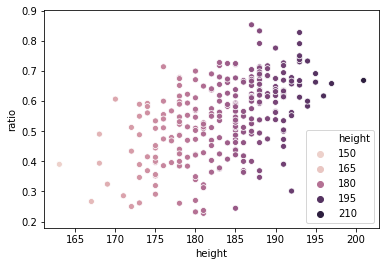

In [16]:
sns.scatterplot(x = temp["height"], y = temp['ratio'], data=temp, hue=temp["height"])